## 온라인 학습활동 과제 17. Logistic Regression 응용

### 20175327 이연희

### Heart Disease UCI

- Data Set Information:
    - 심장질환의 유무를 판정하는 데이터집합
    - Cleveland database 76개 속성중 14개만 추출
- Age: 나이
- Sex: 성별 (1=male. 0=female)
- ChestPain: 흉통 유형(1=전형적인 협심증, 2=비정형 협심증, 3=비협심증, 4=무증상 (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)
- RestBP: 혈압 (resting blood pressure , mmHg)
- Chol: 혈청 (cholestoral mg / dl)
- Fbs: 공복 혈당 (> 120 mg / dl 이면 1, 아니면 0)
- RestECG: 심전도 (0 : 정상, 1 :ST-T 파 이상, 2 :좌심실 비대)
- MaxHR: 최대 심박수
- ExAng: 운동 유발 협심증 (1=yes; 0=no)
- Oldpeak: ST 우울증
- Slope: 최대 운동 ST의 기울기 (1: upsloping, 2: flat, 3: downsloping)
- Ca: 주요혈관수 (0-3)
- Thal: 3 = normal; 6=fixed defect; 7=reversable defect
- AHD: 심장병 진단 결과 (혈관 조영 상태) No: 주요혈관 축소 50%미만, Yes: 주요혈관 축소 50%이상

#### 1)Heart Disease UCI (Heart.csv) 데이터를 읽어서 30%를 test set으로 분리

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Heart.csv 읽어서 30%를 test set으로 분리
heart = pd.read_csv('Heart.csv')
display(heart)

X = heart.drop(['target'],axis=1)
y = heart.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


(212, 13)
(91, 13)
(212,)
(91,)


#### 2)3-NN, Gaussian Naive Bayes, Logistic Regression 분류 알고리즘에 대한 성능 확인

In [3]:
# 3-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("테스트 세트에 대한 출력값:\n {}".format(y_test.values))
print("테스트 세트에 대한 예측값:\n {}".format(y_pred))
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))
print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트에 대한 출력값:
 [0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1
 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1]
테스트 세트에 대한 예측값:
 [0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1
 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1
 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1]
테스트 세트의 정확도: 0.63
테스트 세트의 정확도: 0.63


In [4]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnbfit = gnb.fit(X_train, y_train)
y_pred = gnbfit.predict(X_test)

print("테스트 세트에 대한 출력값:\n {}".format(y_test.values))
print("테스트 세트에 대한 예측값:\n {}".format(y_pred))
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))
print("테스트 세트의 정확도: {:.2f}".format(gnbfit.score(X_test, y_test)))

테스트 세트에 대한 출력값:
 [0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1
 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1]
테스트 세트에 대한 예측값:
 [0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1
 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1
 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1]
테스트 세트의 정확도: 0.84
테스트 세트의 정확도: 0.84


In [7]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs',max_iter=1000)

logregfit = logreg.fit(X_train,y_train)
y_pred = logregfit.predict(X_test)

print("테스트 세트에 대한 출력값:\n {}".format(y_test.values))
print("테스트 세트에 대한 예측값:\n {}".format(y_pred))
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))
print("테스트 세트의 정확도: {:.2f}".format(logregfit.score(X_test, y_test)))

테스트 세트에 대한 출력값:
 [0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1
 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1]
테스트 세트에 대한 예측값:
 [0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1]
테스트 세트의 정확도: 0.81
테스트 세트의 정확도: 0.81


#### 3)Logistic Regression 의 특징 계수(coef)에 대한 그래프를 그리기 (강의자료 10쪽 참고)

In [8]:
X_train.shape[1]
print(X_train.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


D:\python\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


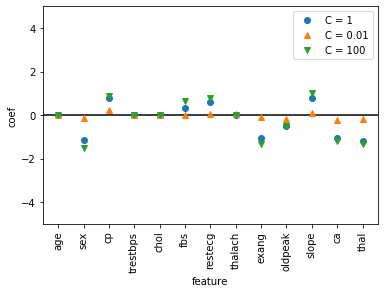

In [9]:
logreg = LogisticRegression(solver='lbfgs',max_iter=1000).fit(X_train,y_train)
logreg_001 = LogisticRegression(C=0.01,solver='lbfgs',max_iter=1000).fit(X_train,y_train)
logreg_100 = LogisticRegression(C=100, solver='lbfgs',max_iter=1000).fit(X_train,y_train)


plt.plot(logreg.coef_.T,'o',label = "C = 1")
plt.plot(logreg_001.coef_.T,'^',label = "C = 0.01")
plt.plot(logreg_100.coef_.T,'v',label = "C = 100")

plt.xticks(range(X_train.shape[1]),X_train.columns,rotation=90)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("feature")
plt.ylabel("coef")
plt.legend()